<a href="https://colab.research.google.com/github/babupallam/Deep-Learning-DL-03-Neural-Network-Architectures/blob/main/02_Implementation_Basic_Perceptron_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02 Basic Perceptron Implementation

## 2.1 Basic Implementation (Step by Step Demonstration) of the model using AND Gate Dataset

#### **Step 1**:
**Import necessary libraries**  
You need to import essential libraries like **NumPy** for performing numerical operations such as matrix manipulations. You can also import visualization libraries like **Matplotlib** to plot the data or visualize the training progress.


In [1]:
import numpy as np
import matplotlib.pyplot as plt



#### **Step 2**:
**Define the perceptron architecture**  
Set up the structure of the perceptron by defining the **input nodes**, **weights**, **bias**, and the **output node**. The perceptron typically has a single output node in the case of binary classification.



In [27]:
class Perceptron:
    def __init__(self, input_size, learning_rate=0.01):
        self.weights = np.random.rand(input_size)  # Random initialization of weights
        self.bias = np.random.rand(1)              # Random initialization of bias
        self.learning_rate = learning_rate

    def activation_function(self, x):
        return np.where(x >= 0, 1, 0)  # Step function

    def forward_propagation(self, inputs):
      z = np.dot(inputs, self.weights) + self.bias  # Weighted sum
      return self.activation_function(z)

    def train(self, inputs, targets, epochs):
        for epoch in range(epochs):
            for i in range(len(inputs)):#one input is one combination of all the features
                output = self.forward_propagation(inputs[i])
                error = targets[i] - output
                self.weights += self.learning_rate * error * inputs[i]
                self.bias += self.learning_rate * error

            # Print the loss every epoch
            total_error = np.sum(np.abs(error))
            print(f'Epoch {epoch+1}, Error: {total_error}')

    def predict(self, inputs):
        return self.forward_propagation(inputs)


#### **Step 3**:
**Initialize weights and bias**  
Initialize the weights and bias for the model. These can be initialized either randomly or with zeros, depending on the approach you'd like to take.



In [28]:
# Already handled inside the Perceptron class (__init__ method)


#### **Step 4**:
**Define the activation function**  
Choose and define an activation function. The step function is commonly used in perceptron models. However, other activation functions may be used depending on the type of problem and the model's requirements.



In [29]:
# Step function is defined as part of the Perceptron class:
# def activation_function(self, x):
#     return np.where(x >= 0, 1, 0)


# np.where(condition, 1, 0): If the condition is True, it assigns a value of 1 (i.e., the neuron "fires"). If the condition is False, it assigns a value of 0 (i.e., the neuron does not "fire").

#### **Step 5**:
**Implement forward propagation**  
During this step, you calculate the weighted sum of the inputs and apply the activation function to get the output. This involves multiplying the input values with their respective weights, adding the bias, and then passing the result through the activation function.



In [30]:
# def forward_propagation(self, inputs):
#     z = np.dot(inputs, self.weights) + self.bias
#     return self.activation_function(z)


**Example **

- inputs = np.array([1, 2])          # Input vector with 2 features
- weights = np.array([0.5, -1.5])     # Weights corresponding to each input

- bias = 0.5                          # Bias term

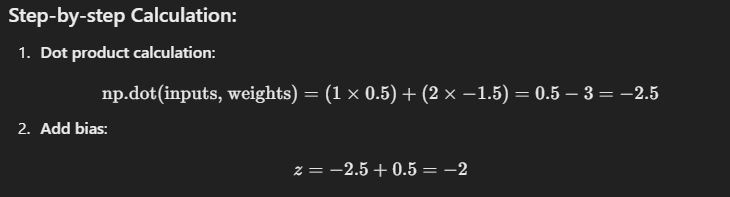

#### **Step 6**:
**Define the loss function**  
For binary classification, a simple binary cross-entropy loss or error rate can be used. The loss function measures how far the model's predictions are from the actual target values, allowing you to minimize this error during training.


In [31]:
# Error is calculated during training:
# error = target - output



#### **Step 7**:
**Implement backpropagation**  
This step involves adjusting the weights based on the error from the forward propagation. The difference between the predicted output and the actual output is used to update the weights in a way that reduces the error.



In [32]:
# The weights and bias are updated like so:
# self.weights += self.learning_rate * error * inputs
# self.bias += self.learning_rate * error


#### **Step 8**:
**Iterate through multiple epochs**  
Loop through multiple training iterations (epochs) to progressively update the weights. With each epoch, the model should ideally minimize the error and improve accuracy.



In [33]:
# def train(self, inputs, targets, epochs):
#     for epoch in range(epochs):
#         for i in range(len(inputs)):
#             output = self.forward_propagation(inputs[i])
#             error = targets[i] - output
#             self.weights += self.learning_rate * error * inputs[i]
#             self.bias += self.learning_rate * error


#### **Step 9**:
**Validate the model**  
After training, test the model using a simple dataset (e.g., AND/OR gates) to validate whether the perceptron correctly classifies the input data.


In [34]:
# Define input and target data for the AND gate
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([0, 0, 0, 1])  # AND gate

# Create the Perceptron model with 2 inputs (for AND gate)
perceptron = Perceptron(input_size=2, learning_rate=0.1)

# Train the model
perceptron.train(inputs, targets, epochs=10)

# Test the model
for i in range(len(inputs)):
    prediction = perceptron.predict(inputs[i])
    print(f'Input: {inputs[i]} -> Predicted: {prediction}')


Epoch 1, Error: 0
Epoch 2, Error: 0
Epoch 3, Error: 0
Epoch 4, Error: 0
Epoch 5, Error: 0
Epoch 6, Error: 0
Epoch 7, Error: 0
Epoch 8, Error: 0
Epoch 9, Error: 0
Epoch 10, Error: 0
Input: [0 0] -> Predicted: [0]
Input: [0 1] -> Predicted: [0]
Input: [1 0] -> Predicted: [0]
Input: [1 1] -> Predicted: [1]


## Extending the model validation using OR Gate Dataset

In [35]:
# done by changing the target array

# Define target data for the OR gate
targets = np.array([0, 1, 1, 1])  # OR gate

# Train the model again
perceptron.train(inputs, targets, epochs=10)

# Test the model
for i in range(len(inputs)):
    prediction = perceptron.predict(inputs[i])
    print(f'Input: {inputs[i]} -> Predicted: {prediction}')


Epoch 1, Error: 0
Epoch 2, Error: 0
Epoch 3, Error: 0
Epoch 4, Error: 0
Epoch 5, Error: 0
Epoch 6, Error: 0
Epoch 7, Error: 0
Epoch 8, Error: 0
Epoch 9, Error: 0
Epoch 10, Error: 0
Input: [0 0] -> Predicted: [0]
Input: [0 1] -> Predicted: [1]
Input: [1 0] -> Predicted: [1]
Input: [1 1] -> Predicted: [1]


## Implementation of Perceptron on Iris Dataset for a Binary Classification Problem

**Problem:**  We will use the Perceptron to classify the Iris dataset into two classes:
- Setosa (Class 0)
- Non-Setosa (Class 1)

Loading the Dataset: We use sklearn.datasets.load_iris() to load the Iris dataset and extract the features (X) and labels (y).

Binary Classification Task: Since the Iris dataset contains three classes, we simplify the problem into a binary classification task:

- Setosa (0) will remain as class 0.
- Versicolor (1) and Virginica (2) will be combined into class 1 (Non-Setosa).

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


Data Preprocessing: We split the data into training and test sets using train_test_split and standardize the features to have a mean of 0 and standard deviation of 1. This helps speed up convergence during training.



In [4]:
# Step 2: Load and Preprocess the Dataset

# Load Iris dataset using sklearn's built-in function
iris = load_iris()

# X contains the features (sepal length, sepal width, petal length, petal width)
X = iris.data

# y contains the labels (Setosa = 0, Versicolor = 1, Virginica = 2)
y = iris.target

# Convert this into a binary classification task:
# We will label Setosa (Class 0) as 0 and all other flowers (Versicolor and Virginica) as 1
y = np.where(y == 0, 0, 1)  # If y == 0, set to 0 (Setosa), otherwise set to 1 (Non-Setosa)

# Split the dataset into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the dataset to ensure that the features have a mean of 0 and a standard deviation of 1
# This helps the model converge faster and makes the features comparable
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform the training set
X_test = scaler.transform(X_test)        # Transform the test set using the same scaler (to avoid data leakage)


Defining the Perceptron Model: We define the Perceptron class that performs forward propagation, backpropagation, and updates the weights using gradient descent.



In [5]:
# Step 3: Define the Perceptron Class

# Define the Perceptron class
class Perceptron:
    def __init__(self, input_size, learning_rate=0.01):
        """
        Initialize the Perceptron with:
        - input_size: Number of features in the dataset (e.g., 4 for the Iris dataset)
        - learning_rate: Rate at which weights are updated during backpropagation
        """
        self.weights = np.random.rand(input_size)  # Initialize weights randomly
        self.bias = np.random.rand(1)              # Initialize bias randomly
        self.learning_rate = learning_rate         # Learning rate for gradient descent

    def activation_function(self, x):
        """
        Step activation function: Returns 1 if input >= 0, else returns 0.
        This is how the Perceptron makes decisions.
        """
        return np.where(x >= 0, 1, 0)

    def forward_propagation(self, inputs):
        """
        Perform forward propagation:
        Compute the weighted sum of the inputs and pass it through the activation function.
        """
        z = np.dot(inputs, self.weights) + self.bias  # Weighted sum: z = w*x + b
        return self.activation_function(z)            # Apply step function to get output

    def train(self, inputs, targets, epochs):
        """
        Train the Perceptron over a number of epochs:
        - inputs: Training data
        - targets: True labels for the training data
        - epochs: Number of times the model should see the full dataset
        """
        for epoch in range(epochs):
            total_error = 0  # Track the total error for each epoch
            for i in range(len(inputs)):
                # Forward propagate to get the output
                output = self.forward_propagation(inputs[i])
                # Calculate the error (difference between the true label and the prediction)
                error = targets[i] - output
                # Update the weights based on the error and input using gradient descent
                self.weights += self.learning_rate * error * inputs[i]
                # Update the bias based on the error
                self.bias += self.learning_rate * error
                # Sum the total error for this epoch (used for logging purposes)
                total_error += np.abs(error)
            # Log the total error for each epoch
            print(f'Epoch {epoch+1}, Total Error: {total_error}')

    def predict(self, inputs):
        """
        Predict the class for a given set of inputs (can be used on test data)
        """
        return self.forward_propagation(inputs)

Training the Model: The model is trained over a number of epochs, during which it updates the weights and bias based on the error (difference between predicted and actual labels).



In [6]:
# Step 4: Train the Perceptron Model

# Create a Perceptron model with 4 input features (sepal length, sepal width, petal length, petal width)
# We will use a learning rate of 0.1
perceptron = Perceptron(input_size=4, learning_rate=0.1)

# Train the Perceptron on the training dataset for 10 epochs
# This means the model will iterate over the entire dataset 10 times
perceptron.train(X_train, y_train, epochs=10)

Epoch 1, Total Error: [5]
Epoch 2, Total Error: [0]
Epoch 3, Total Error: [0]
Epoch 4, Total Error: [0]
Epoch 5, Total Error: [0]
Epoch 6, Total Error: [0]
Epoch 7, Total Error: [0]
Epoch 8, Total Error: [0]
Epoch 9, Total Error: [0]
Epoch 10, Total Error: [0]


Testing the Model: After training, we evaluate the model’s accuracy by testing it on the unseen test data.



In [7]:
# Step 5: Test the Model

# Now we will evaluate the model's performance on the test dataset
# We will predict the labels for the test set and then compare them with the true labels
predictions = []
for i in range(len(X_test)):
    predictions.append(perceptron.predict(X_test[i]))

# Convert the predictions list to a numpy array to make evaluation easier
predictions = np.array(predictions).flatten()

# Calculate accuracy by comparing predictions with the true labels (y_test)
accuracy = np.mean(predictions == y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


Test Accuracy: 100.00%


Visualization: We use two features (petal length and petal width) to visualize the decision boundary and show how the Perceptron separates the data.



Epoch 1, Total Error: [1]
Epoch 2, Total Error: [0]
Epoch 3, Total Error: [0]
Epoch 4, Total Error: [0]
Epoch 5, Total Error: [0]
Epoch 6, Total Error: [0]
Epoch 7, Total Error: [0]
Epoch 8, Total Error: [0]
Epoch 9, Total Error: [0]
Epoch 10, Total Error: [0]


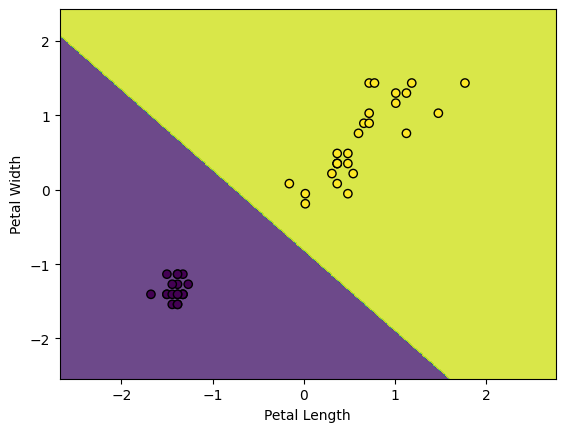

In [13]:

# Step 6: Visualize the Results

# For simplicity, we will now visualize the decision boundary for two features (Petal Length and Petal Width)
# To do this, we will select only two features from the dataset and retrain the model on those two features

# Select two features: Petal Length (feature 2) and Petal Width (feature 3)
X_train_2D = X_train[:, [2, 3]]  # Extract only two columns
X_test_2D = X_test[:, [2, 3]]    # Same for the test set

#X_train_2D and X_test_2D: We are selecting only two features from the Iris dataset: petal length (feature 2) and petal width (feature 3).
#This step is essential because visualizing a decision boundary in more than 2 dimensions (e.g., with 4 features) is difficult. By reducing the dataset to 2 features, we can easily plot it on a 2D plane.


#=============
# Retrain the Perceptron model using only these two features
perceptron_2D = Perceptron(input_size=2, learning_rate=0.1)
perceptron_2D.train(X_train_2D, y_train, epochs=10)

# perceptron_2D: We create a new Perceptron model with an input size of 2 (since we are only using two features now: petal length and petal width).


#==============
# Define a function to plot the decision boundary
def plot_decision_boundary(X, y, model):
    # Create a meshgrid for plotting the decision boundary
    # We create a meshgrid which is essentially a grid of points spanning the range of values of the two selected features (petal length and petal width). This grid will cover the entire feature space, with a step size of 0.01 between each grid point.
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    #---------------
    # Predict the class for each point in the meshgrid using the trained model
    # The meshgrid (which consists of coordinates for each point in the feature space) is flattened using ravel(), and the Perceptron predicts the class label for each point using model.predict(). The predicted values are then reshaped to match the original grid shape using reshape(xx.shape).
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    #Note: ravel() has flattened the 2D array arr into a 1D array.

    # Plot the decision boundary as a contour plot
    plt.contourf(xx, yy, Z, alpha=0.8)
    #alpha=0.8: This parameter controls the transparency of the filled contours

    # Plot the data points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    # X[:, 0]: This represents all the rows of the first column in the array X. In the context of the Iris dataset being visualized, this would typically represent one feature of the dataset, such as the petal length.

    # X[:, 1]: This accesses all the rows of the second column in the array X, which corresponds to another feature like petal width. The use of the first two columns suggests these are the two features being plotted against each other on the x and y axes, respectively.

    # c=y: The c parameter sets the color of each point in the scatter plot.  If y contains numerical labels or categorical data converted to numbers, each unique value (or class) will be represented by a different color.

    # edgecolors='k': This parameter sets the color of the edges of each marker (or point) on the scatter plot. k is for black

    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')
    plt.show()

# Plot the decision boundary on the test set
plot_decision_boundary(X_test_2D, y_test, perceptron_2D)

# Explanation:

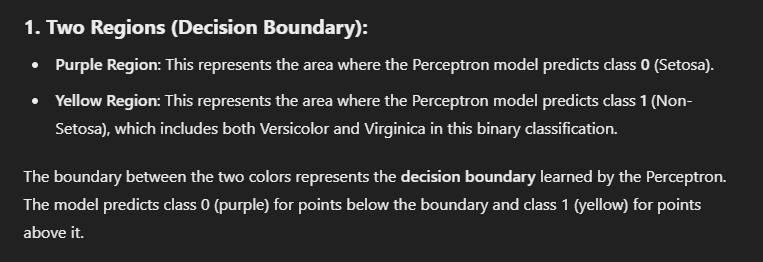

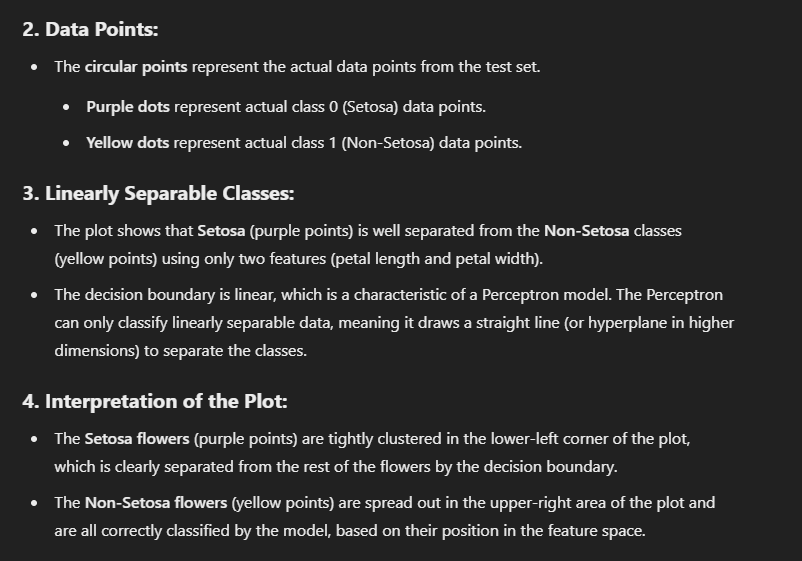